In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Train and Test
- Date ranges
  - Training data ranges from 2023-01-01 to 2017-08-15
  - Testing data ranges from 2017-08-16 to 2017-08-31

- There are 1782 unique combinations of family + stores

In [3]:
train = pd.read_csv('train.csv')
train['date'] = pd.to_datetime(train.date)
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
pd.to_datetime(train.date.astype(str)).describe()

count                          3000888
mean     2015-04-24 08:27:04.703088384
min                2013-01-01 00:00:00
25%                2014-02-26 18:00:00
50%                2015-04-24 12:00:00
75%                2016-06-19 06:00:00
max                2017-08-15 00:00:00
Name: date, dtype: object

In [5]:
test = pd.read_csv("test.csv")
test['date'] = pd.to_datetime(test.date)

test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
pd.to_datetime(test.date.astype(str)).describe()

count                  28512
mean     2017-08-23 12:00:00
min      2017-08-16 00:00:00
25%      2017-08-19 18:00:00
50%      2017-08-23 12:00:00
75%      2017-08-27 06:00:00
max      2017-08-31 00:00:00
Name: date, dtype: object

In [7]:
(pd.MultiIndex.from_frame(train[['store_nbr','family']]).nunique(),
 pd.MultiIndex.from_frame(test[['store_nbr','family']]).nunique()
)

(1782, 1782)

In [8]:
stores = pd.read_csv('stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
oil = pd.read_csv('oil.csv')
oil['date'] = pd.to_datetime(oil.date)
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
oil.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


### Explore Holidays
- There is only one holiday in the testing range (`Fundacion de Ambato`) => This means we don't need to focus too much on predicting impact of other holidays, assuming that holidays impact sales only on the day of the holiday. Perhaps discard all non-relevant holidays entirely?
- Regional/local holidays should only impact sales from that specific region/locale => Need to merge data accordingly
- Secondary observations
  - Multiple holidays can occur on the same day
  - Some holidays lead to lower or no sales, other holidays have higher sales => Need to care about which holidays we're talking about


In [11]:
holidays_events = pd.read_csv("holidays_events.csv")
holidays_events['date'] = pd.to_datetime(holidays_events.date)

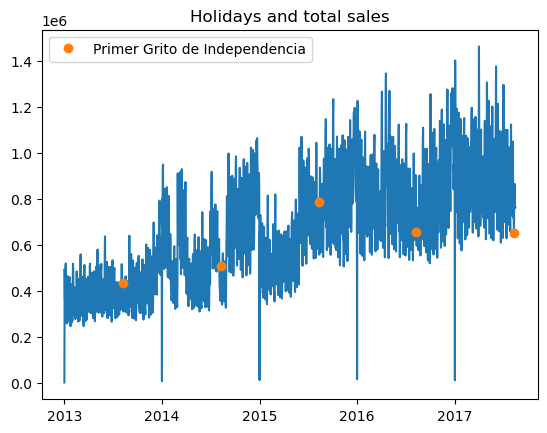

In [12]:
plt.plot(train.groupby('date').sales.sum())

values = ['National']
col = 'locale'

values = ['Primer Grito de Independencia']
col = 'description'

for types_i in values:
    fil = lambda x: (x[col] == types_i) 
    plt.plot(holidays_events.drop_duplicates(subset=['date'])[fil].merge(train[['date','sales']],on='date').groupby('date').sales.sum(),'o',label=types_i)

plt.legend();
plt.title("Holidays and total sales");

In [13]:
holidays_events.date.value_counts().head(5)

date
2014-06-25    4
2013-06-25    3
2016-06-25    3
2017-06-25    3
2012-06-25    3
Name: count, dtype: int64

In [14]:
holidays_events[lambda x: x.date.between('2017-08-15','2017-08-31')]

,date,type,locale,locale_name,description,transferred
326,2017-08-15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
327,2017-08-24,Holiday,Local,Ambato,Fundacion de Ambato,False


In [15]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [16]:
holidays_events.description.value_counts().head(20)

description
Carnaval                         10
Fundacion de Ibarra               7
Fundacion de Cuenca               7
Cantonizacion de Libertad         6
Cantonizacion de Riobamba         6
Cantonizacion del Puyo            6
Fundacion de Manta                6
Cantonizacion de Guaranda         6
Provincializacion de Imbabura     6
Fundacion de Machala              6
Cantonizacion de Latacunga        6
Cantonizacion de El Carmen        6
Cantonizacion de Cayambe          6
Fundacion de Esmeraldas           6
Fundacion de Santo Domingo        6
Primer Grito de Independencia     6
Fundacion de Riobamba             6
Fundacion de Ambato               6
Cantonizacion de Quevedo          6
Independencia de Guayaquil        6
Name: count, dtype: int64

## Transform Data
- Some stores only open in middle of training set (e.g. store 52). Be careful with trends here

In [425]:
df.open[lambda x: ~x].reset_index().groupby(['store_nbr','family']).date.max()[lambda x: x != '2017-08-15'].sort_values(ascending=False)

store_nbr  family                    
6          BABY CARE                     2017-07-07
14         LADIESWEAR                    2017-05-03
12         LADIESWEAR                    2017-04-26
22         LADIESWEAR                    2017-04-19
52         LINGERIE                      2017-04-19
           LAWN AND GARDEN               2017-04-19
           LADIESWEAR                    2017-04-19
           HOME CARE                     2017-04-19
           GROCERY II                    2017-04-19
           HOME AND KITCHEN II           2017-04-19
           HOME AND KITCHEN I            2017-04-19
           HARDWARE                      2017-04-19
           FROZEN FOODS                  2017-04-19
           GROCERY I                     2017-04-19
           PLAYERS AND ELECTRONICS       2017-04-19
           PET SUPPLIES                  2017-04-19
           BEAUTY                        2017-04-19
           BREAD/BAKERY                  2017-04-19
           BEVERAGES      

### Merge Oil and Store data

In [572]:
df = train[lambda x: x.date >= '2017'].merge(oil,on='date').merge(stores,on=['store_nbr'])
df = df.set_index('date').to_period('D').set_index(['store_nbr','family'],append=True)

df_test = test.set_index('date').to_period('D').set_index(['store_nbr','family'],append=True)


### Detector new store openings

In [573]:
df['open'] = (df.groupby(['store_nbr','family']).sales).cumsum() > 0

### Filter holidays

### Feature: Deterministic Process

In [574]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.linear_model import LinearRegression

In [575]:
pd.set_option('display.max_rows', 500)

In [576]:
y = df['sales'].unstack().unstack()
t = y.index

t_pred = df_test.index.get_level_values(0).unique()

In [577]:
dp = DeterministicProcess(index=y.index, order=1,additional_terms=[CalendarFourier(freq='W',order=7),CalendarFourier(freq='ME',order=4)])
X = dp.in_sample()
X_fore = dp.out_of_sample(16)

model = LinearRegression()
model.fit(X, y)

y_pred = pd.DataFrame(model.predict(X),index=t,columns=y.columns).clip(0.0)
y_fore = pd.DataFrame(model.predict(X_fore),index=t_pred,columns=y.columns).clip(0.0)

In [578]:
y.columns.get_level_values(0).unique()

Index(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
       'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
      dtype='object', name='family')

In [579]:
y.columns.get_level_values(1).unique()

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
      dtype='int64', name='store_nbr')

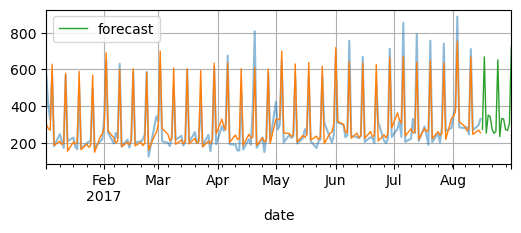

In [583]:
fil = ("MEATS",20)
ax = y[fil].plot(label="sales",marker="",alpha=0.5)
ax = y_pred[fil].plot(ax=ax, linewidth=1, label="trend", color='C1')
ax = y_fore[fil].plot(ax=ax, linewidth=1, label="forecast", color='C2',legend=True,grid=True,figsize=(6,2))

In [584]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_true=y[fil],y_pred=y_pred[fil]))

np.float64(0.1709994909380001)

In [507]:
# np.sqrt(mean_squared_log_error(y_true=y.loc[:,(slice(None),49)],y_pred=y_pred.loc[:,(slice(None),49)]))

In [508]:
# np.sqrt(mean_squared_log_error(y_true=y.loc[:,("SEAFOOD")],y_pred=y_pred.loc[:,("SEAFOOD")]))

### Only fit sales when store+family is open

In [426]:
fil = ("LADIESWEAR",22)
tfil = df['open'].unstack().unstack()[fil]

In [427]:
y = df['sales'].unstack().unstack()[fil][tfil]
t = y.index

t_pred = df_test.index.get_level_values(0).unique()

In [428]:
dp = DeterministicProcess(index=y.index, 
                          order=1,
                          additional_terms=[CalendarFourier(freq='W',order=1),
                                            CalendarFourier(freq='ME',order=4)]
                         )
X = dp.in_sample()
X_fore = dp.out_of_sample(16)

model = LinearRegression()
model.fit(X, y)

y_pred = pd.DataFrame(model.predict(X),index=t,columns=['predicted']).clip(0.0)
y_fore = pd.DataFrame(model.predict(X_fore),index=t_pred,columns=['forecast']).clip(0.0)

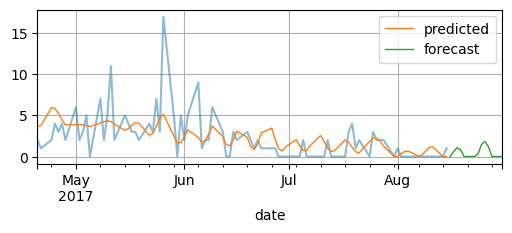

In [430]:
ax = y.plot(label="sales",marker="",alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=1, label="trend", color='C1')
ax = y_fore.plot(ax=ax, linewidth=1, label="forecast", color='C2',legend=True,grid=True,figsize=(6,2))

In [431]:
np.sqrt(mean_squared_log_error(y_true=y,y_pred=y_pred))

np.float64(0.5998375648922424)

### Prediction Class

In [376]:
dfslice = df.loc[(slice(None),52,'AUTOMOTIVE'),['open','sales']]
# dfslice.loc[lambda x: x.open,'sales']

In [377]:
class SalesPrediction():
    def __init__(self,df,family,store_nbr):
        self.family = family
        self.store_nbr = store_nbr 
        self.df = df

    def createTarget(self):
        dfslice = self.df.loc[(slice(None),self.store_nbr,self.family),['open','sales']]
        # self.is_open = dfslice['open']
        y = dfslice.loc[lambda x: x.open,'sales']
        return y               

    def createFeatures(self,index):
        dp = DeterministicProcess(index=index, 
                                  order=1,
                                  additional_terms=[CalendarFourier(freq='ME',order=4),
                                                    CalendarFourier(freq='YE',order=12),
                                                    CalendarFourier(freq='W',order=1),
                                                   ])
        X = dp.in_sample()
        return X

    def fit(self,X,y):
        self.model = LinearRegression()
        self.model.fit(X, y)

    def predict(self,X):
        return self.model.predict(X).clip(0.0)

Text(0.5, 1.0, 'RMSLE = 0.1812')

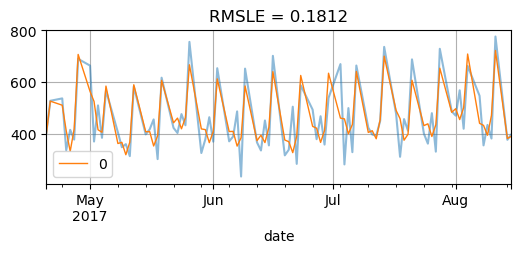

In [378]:
sp = SalesPrediction(df,family="POULTRY",store_nbr=52)
y = sp.createTarget()
X = sp.createFeatures(index=y.index.get_level_values(0))
sp.fit(X,y)
y_pred = pd.Series(sp.predict(X),index=y.index.get_level_values(0))

ax = y.reset_index().set_index('date').sales.plot(label="sales",marker="",alpha=0.5)
ax = y_pred.reset_index().set_index('date').plot(ax=ax, linewidth=1, label="trend", color='C1',legend=True,grid=True,figsize=(6,2))
ax.set_title(f"RMSLE = {np.sqrt(mean_squared_log_error(y_true=y,y_pred=y_pred)):.4f}")

### Multiple Prediction Class

In [450]:
ft = DeterministicProcess(index=df.index.get_level_values(0).unique(),
                                             order=0,
                                             additional_terms=[CalendarFourier(freq='ME',order=4),
                                                               CalendarFourier(freq='YE',order=12),
                                                               CalendarFourier(freq='W',order=1)])

In [475]:
from collections import defaultdict

class MultipleSalesPrediction():
    def __init__(self,df):
        self.df = df
        self.outputLabel = self.df.index.droplevel(0).unique()

    def train(self):
        self.prediction = defaultdict(dict)     
        
        df['is_open'] = np.nan

        fourier_terms = DeterministicProcess(index=self.df.index.get_level_values(0).unique(),
                                             order=0,
                                             additional_terms=[CalendarFourier(freq='ME',order=4),
                                                               CalendarFourier(freq='YE',order=12),
                                                               CalendarFourier(freq='W',order=1)]).in_sample()
        
        for store_nbr,family in tqdm.tqdm(self.outputLabel):        
            
            sp = SalesPrediction(self.df,family=family,store_nbr=store_nbr)  
            y = sp.createTarget()
            yindex = y.index.get_level_values(0)
            

            X = fourier_terms.loc[yindex]
            trend_terms = DeterministicProcess(index=yindex,order=1).in_sample()  
            # print(X.shape)
            # print(trend_terms.shape)
            X = np.concat([X,trend_terms],axis=1)
            # print(X.shape)
            # print(self.prediction[(store_nbr,family)]['y'].shape)
            if len(y) > 0:
                sp.fit(X,y)
                y_pred = pd.Series(sp.predict(X),index=yindex)
                
                # self.prediction[(store_nbr,family)]['X'] = X   
                # self.prediction[(store_nbr,family)]['y'] = y            
                # self.prediction[(store_nbr,family)]['ypred'] = y_pred
                self.prediction[(store_nbr,family)]['score'] = np.sqrt(mean_squared_log_error(y_true=y,y_pred=y_pred))
                # try:
                #     self.prediction[(store_nbr,family)]['opendate'] = sp.is_open.index[sp.is_open].min()
                # except:
                #     print(store_nbr, family)
    
                # self.df.loc[(slice(None),store_nbr,family),'is_open'] = sp.is_open   

    def evaluate(self):

        ypred = []
        ytrue = []
        for store_nbr,family in self.outputLabel:    
            ypred.append(list(self.prediction[(store_nbr,family)]['ypred']))
            true.append(list(self.prediction[(store_nbr,family)]['y']))

        return np.sqrt(mean_squared_log_error(y_true=ytrue,y_pred=y_pred))

In [476]:
msp = MultipleSalesPrediction(df)

In [477]:
msp.train()

100%|█████████████████████████████████████████████████████████████████████████████| 1782/1782 [00:14<00:00, 124.88it/s]


In [474]:
import tqdm
outputlabels = df.index.droplevel(0).unique()
prediction = defaultdict(dict)
for store_nbr,family in tqdm.tqdm(outputlabels):            
    sp = SalesPrediction(df,family=family,store_nbr=store_nbr)  
    prediction[(store_nbr,family)]['y'] = sp.createTarget() 
    prediction[(store_nbr,family)]['X'] = sp.createFeatures(index=y.index.get_level_values(0))            
    sp.fit(X,y)
    # prediction[(store_nbr,family)]['ypred'] = pd.Series(sp.predict(X),index=y.index.get_level_values(0))
    # prediction[(store_nbr,family)]['score'] = np.sqrt(mean_squared_log_error(y_true=y,y_pred=y_pred))
    # prediction[(store_nbr,family)]['opendate'] = sp.is_open.index[sp.is_open].min()
    # print(store_nbr, family)

    # df.loc[(slice(None),store_nbr,family),'is_open'] = sp.is_open   


 21%|████████████████▎                                                              | 369/1782 [00:04<00:16, 86.95it/s]


KeyboardInterrupt: 

PeriodIndex(['2017-01-02', '2017-01-02', '2017-01-02', '2017-01-02',
             '2017-01-02', '2017-01-02', '2017-01-02', '2017-01-02',
             '2017-01-02', '2017-01-02',
             ...
             '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
             '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
             '2017-08-15', '2017-08-15'],
            dtype='period[D]', name='date', length=288684)

In [446]:
DeterministicProcess(index=df.index.get_level_values(0).unique(), 
                                  order=0).in_sample()

""
date
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-11
2016-01-12
2016-01-13
2016-01-14


In [448]:
testall = DeterministicProcess(index=df.index.get_level_values(0).unique(), 
                                  order=0,
                                  additional_terms=[CalendarFourier(freq='ME',order=4)])
testall.in_sample()[lambda x: (x.index >= '2017-04') & (x.index <= '2017-05')]


,"sin(1,freq=ME)","cos(1,freq=ME)","sin(2,freq=ME)","cos(2,freq=ME)","sin(3,freq=ME)","cos(3,freq=ME)","sin(4,freq=ME)","cos(4,freq=ME)"
date,,,,,,,,
2017-04-03,0.406737,0.913545,0.743145,0.669131,9.510565e-01,0.309017,0.994522,-0.104528
2017-04-04,0.587785,0.809017,0.951057,0.309017,9.510565e-01,-0.309017,0.587785,-0.809017
2017-04-05,0.743145,0.669131,0.994522,-0.104528,5.877853e-01,-0.809017,-0.207912,-0.978148
2017-04-06,0.866025,0.500000,0.866025,-0.500000,1.224647e-16,-1.000000,-0.866025,-0.500000
2017-04-07,0.951057,0.309017,0.587785,-0.809017,-5.877853e-01,-0.809017,-0.951057,0.309017
2017-04-10,0.951057,-0.309017,-0.587785,-0.809017,-5.877853e-01,0.809017,0.951057,0.309017
2017-04-11,0.866025,-0.500000,-0.866025,-0.500000,-2.449294e-16,1.000000,0.866025,-0.500000
2017-04-12,0.743145,-0.669131,-0.994522,-0.104528,5.877853e-01,0.809017,0.207912,-0.978148
2017-04-13,0.587785,-0.809017,-0.951057,0.309017,9.510565e-01,0.309017,-0.587785,-0.809017


In [441]:
testall = DeterministicProcess(index=df.reset_index().loc[lambda x: (x.family == 'AUTOMOTIVE') & (x.store_nbr == 52) & x.open,'date'], 
                               order=1,
                               additional_terms=[CalendarFourier(freq='ME',order=4)])

testall.in_sample()[lambda x: (x.index >= '2017-04') & (x.index <= '2017-05')]


,trend,"sin(1,freq=ME)","cos(1,freq=ME)","sin(2,freq=ME)","cos(2,freq=ME)","sin(3,freq=ME)","cos(3,freq=ME)","sin(4,freq=ME)","cos(4,freq=ME)"
date,,,,,,,,,
2017-04-20,1.0,-0.743145,-0.669131,0.994522,-0.104528,-5.877853e-01,0.809017,-0.207912,-0.978148
2017-04-21,2.0,-0.866025,-0.500000,0.866025,-0.500000,-4.898587e-16,1.000000,-0.866025,-0.500000
2017-04-24,3.0,-0.994522,0.104528,-0.207912,-0.978148,9.510565e-01,-0.309017,0.406737,0.913545
2017-04-25,4.0,-0.951057,0.309017,-0.587785,-0.809017,5.877853e-01,-0.809017,0.951057,0.309017
2017-04-26,5.0,-0.866025,0.500000,-0.866025,-0.500000,6.123234e-16,-1.000000,0.866025,-0.500000
2017-04-27,6.0,-0.743145,0.669131,-0.994522,-0.104528,-5.877853e-01,-0.809017,0.207912,-0.978148
2017-04-28,7.0,-0.587785,0.809017,-0.951057,0.309017,-9.510565e-01,-0.309017,-0.587785,-0.809017
2017-05-01,8.0,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000


# Fitting Strategy

In [585]:
df = train[lambda x: x.date >= '2017'].merge(oil,on='date').merge(stores,on=['store_nbr'])
df = df.set_index('date').to_period('D').set_index(['store_nbr','family'],append=True)

df_test = test.set_index('date').to_period('D').set_index(['store_nbr','family'],append=True)

In [ ]:

df['open'] = (df.groupby(['store_nbr','family']).sales).cumsum() > 0

In [ ]:
from collections import defaultdict

class MultipleSalesPrediction():
    def __init__(self,df,lookbackDate):
        self.df = df
        self.outputLabel = self.df.index.droplevel(0).unique()
        self.lookbackDate = lookbackDate

    def bulkTrain(self):

    def 

    def train(self):
        self.prediction = defaultdict(dict)     
        
        df['is_open'] = np.nan

        fourier_terms = DeterministicProcess(index=self.df.index.get_level_values(0).unique(),
                                             order=0,
                                             additional_terms=[CalendarFourier(freq='ME',order=4),
                                                               CalendarFourier(freq='YE',order=12),
                                                               CalendarFourier(freq='W',order=1)]).in_sample()
        
        for store_nbr,family in tqdm.tqdm(self.outputLabel):        
            
            sp = SalesPrediction(self.df,family=family,store_nbr=store_nbr)  
            y = sp.createTarget()
            yindex = y.index.get_level_values(0)
            

            X = fourier_terms.loc[yindex]
            trend_terms = DeterministicProcess(index=yindex,order=1).in_sample()  
            # print(X.shape)
            # print(trend_terms.shape)
            X = np.concat([X,trend_terms],axis=1)
            # print(X.shape)
            # print(self.prediction[(store_nbr,family)]['y'].shape)
            if len(y) > 0:
                sp.fit(X,y)
                y_pred = pd.Series(sp.predict(X),index=yindex)
                
                # self.prediction[(store_nbr,family)]['X'] = X   
                # self.prediction[(store_nbr,family)]['y'] = y            
                # self.prediction[(store_nbr,family)]['ypred'] = y_pred
                self.prediction[(store_nbr,family)]['score'] = np.sqrt(mean_squared_log_error(y_true=y,y_pred=y_pred))
                # try:
                #     self.prediction[(store_nbr,family)]['opendate'] = sp.is_open.index[sp.is_open].min()
                # except:
                #     print(store_nbr, family)
    
                # self.df.loc[(slice(None),store_nbr,family),'is_open'] = sp.is_open   

    def evaluate(self):

        ypred = []
        ytrue = []
        for store_nbr,family in self.outputLabel:    
            ypred.append(list(self.prediction[(store_nbr,family)]['ypred']))
            true.append(list(self.prediction[(store_nbr,family)]['y']))

        return np.sqrt(mean_squared_log_error(y_true=ytrue,y_pred=y_pred))